<a href="https://colab.research.google.com/github/MegaPlayer64/CodingDojoDataScienceClasses/blob/First-Activities/Ejercicio_m%C3%A9tricas_de_regresi%C3%B3n_(base)_y_Ejercicio_b%C3%A1sico_de_conjunto_de_%C3%A1rboles.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**README**

Este proyecto contiene 2 asignaciones dadas, las de ejercicios de metricas de regresión y el ejercicio basico de conjunto de árboles, eso se debe a que reutilizan el mismo DataFrame y datos del codigo para realizarse.

# **Tarea N°0.- Preparar todo**


In [17]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import set_config
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.compose import make_column_selector
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_transformer, make_column_selector
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import RandomForestRegressor

df = pd.read_csv('/content/Boston_Housing_from_Sklearn.csv')
df.head()


,CRIM,NOX,RM,AGE,PTRATIO,LSTAT,PRICE
0,0.00632,0.538,6.575,65.2,15.3,4.98,24.0
1,0.02731,0.469,6.421,78.9,17.8,9.14,21.6
2,0.02729,0.469,7.185,61.1,17.8,4.03,34.7
3,0.03237,0.458,6.998,45.8,18.7,2.94,33.4
4,0.06905,0.458,7.147,54.2,18.7,5.33,36.2


# **Tarea N°1.- Ejercicio métricas de regresión (base)**

# Actividad 1.-
Realicen un mapa de calor de las correlaciones.  Identifiquen cualquier característica que tenga un coeficiente de correlación de magnitud 0,5 (puede ser + o -) o mayor con el precio. Limitaremos nuestros análisis de estas tres características.

<function matplotlib.pyplot.show(close=None, block=None)>

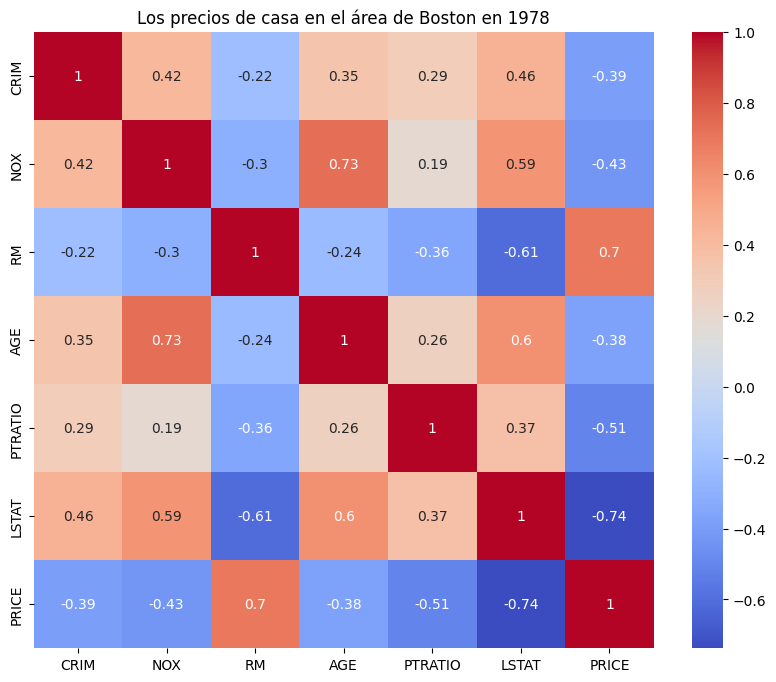

In [ ]:
Thing = df.corr()
plt.figure(figsize = (10,8))
sns.heatmap(Thing, annot=True, cmap="coolwarm")
plt.title("Los precios de casa en el área de Boston en 1978")
plt.show

# Actividad 2.-
Seleccionen las columnas para la matriz de características (X) y seleccionen el PRECIO para el vector objetivo (y).


In [18]:
y = df['PRICE']
X = df[['RM',	'PTRATIO', 'LSTAT']]

# Actividad 3.-
Dividan los datos en grupos de entrenamiento y de prueba. ¡Usen el número 42 para la consistencia!

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# Actividad 4.-
Instancien el modelo y ajústenlo al conjunto de entrenamiento.

In [20]:
cat_selector = make_column_selector(dtype_include='object')
num_selector = make_column_selector(dtype_include='number')
freq_imputer = SimpleImputer(strategy='most_frequent')
mean_imputer = SimpleImputer(strategy='mean')
median_imputer = SimpleImputer(strategy='median')
scaler = StandardScaler()
ohe = OneHotEncoder(handle_unknown='ignore', sparse=False)
preprocessing_pipeline = make_pipeline(median_imputer, scaler)
preprocessing_pipeline.fit(X_train)
numeric_pipe = make_pipeline(mean_imputer, scaler)
categorical_pipe = make_pipeline(freq_imputer, ohe)
number_tuple = (numeric_pipe, num_selector)
category_tuple = (categorical_pipe, cat_selector)
preprocessor = make_column_transformer(number_tuple, category_tuple)
X_train_processed = preprocessing_pipeline.transform(X_train)
X_test_processed = preprocessing_pipeline.transform(X_test)
reg = LinearRegression()
reg.fit(X_train,y_train)
train_score = reg.score(X_train, y_train)
test_score = reg.score(X_test, y_test)
train_preds = reg.predict(X_train)
test_preds = reg.predict(X_test)

# Actividad 5.-
Evaluar el modelo de rendimiento en el conjunto de entrenamiento y de prueba usando la puntuación R^2.  ¿Existe alguna diferencia entre el modelo de rendimiento en los datos de entrenamiento vs. los datos de prueba?

In [21]:
r2_train = r2_score(y_train, train_preds)
r2_test = r2_score(y_test, test_preds)
print("R^2 Train is:", r2_train)
print("R^2 Test is:", r2_test)

R^2 Train is: 0.6877966145058925
R^2 Test is: 0.6331590458194678


# Actividad 6.-
Evalúen el modelo usando el error absoluto medio (EAM).

In [11]:
mae_train = mean_absolute_error(y_train, train_preds)
mae_test = mean_absolute_error(y_test, test_preds)
print("MAE Train is:", mae_train)
print("MAE Test is:", mae_test)

MAE Train is: 3.714054057158005
MAE Test is: 3.3918448293813976


# Actividad 7.-
Evalúen el modelo usando el error cuadrático medio (ECM).  

In [12]:
mse_train = mean_squared_error(y_train, train_preds)
mse_test = mean_squared_error(y_test, test_preds)
print("MSE Train is:", mse_train)
print("MSE Test is:", mse_test)

MSE Train is: 27.68673681796949
MSE Test is: 25.688824196675952


# Actividad 8.-
Evalúen el modelo de rendimiento usando RECM en el conjunto de entrenamiento y de prueba. Esta métrica es útil porque las unidades estarán en las mismas unidas del vector objetivo. En este caso mil dólares.  



In [13]:
rmse_train = np.sqrt(mean_squared_error(y_train, train_preds))
rmse_test = np.sqrt(mean_squared_error(y_test, test_preds))
print("RMSE Train is:", rmse_train)
print("RMSE Test is:", rmse_test)

RMSE Train is: 5.261818774717492
RMSE Test is: 5.068414367104958


# **Tarea N°2.- Ejercicio básico de conjunto de árboles**

# Actividad 0.-
Por si no lo hicieron antes en la tarea N°1:

In [27]:
y = df['PRICE']
X = df[['RM',	'PTRATIO', 'LSTAT']]
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# Actividad 1.-
Bagged Trees

In [14]:
bagreg = BaggingRegressor(random_state = 42)
bagreg.get_params()

{'base_estimator': 'deprecated',
 'bootstrap': True,
 'bootstrap_features': False,
 'estimator': None,
 'max_features': 1.0,
 'max_samples': 1.0,
 'n_estimators': 10,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

In [15]:
bagreg.fit(X_train, y_train)
bagreg.predict(X_test)
bagreg_train_score = bagreg.score(X_train, y_train)
bagreg_test_score = bagreg.score(X_test, y_test)
print(bagreg_train_score)
print(bagreg_test_score)

0.9589474812896627
0.6810228787398808


# Actividad 2.-
Regresión de bosque aleatorio

In [22]:
rf = RandomForestRegressor(random_state = 42)
rf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 1.0,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

In [23]:
rf.fit(X_train, y_train)
rf.predict(X_test)
rf_train_score = rf.score(X_train, y_train)
rf_test_score = rf.score(X_test, y_test)
print(rf_train_score)
print(rf_test_score)

0.9728543493496158
0.7185553579730205


In [ ]:
rf_9 = RandomForestRegressor(max_depth = 9, random_state = 42)
rf_9.fit(X_train, y_train)
rf_9_train_score = rf_9.score(X_train, y_train)
rf_9_test_score = rf_9.score(X_test, y_test)
print(rf_9_train_score)
print(rf_9_test_score)

In [ ]:
[estimator.get_depth() for estimator in rf.estimators_]

In [26]:
rf_200 = RandomForestRegressor(n_estimators = 200, random_state = 42)
rf_200.fit(X_train, y_train)
rf_200_train_score = rf_200.score(X_train, y_train)
rf_200_test_score = rf_200.score(X_test, y_test)
print(rf_200_train_score)
print(rf_200_test_score)


0.9735085200463167
0.7257019426162479
